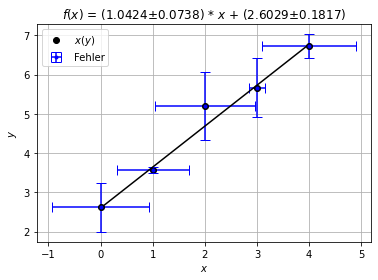

In [22]:
#https://docs.scipy.org/doc/scipy/reference/odr.html

import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
import random

def fit(x,y,x_err,y_err):
    
    def lin_func(B, x):
        [m,b]=B
        return m*x+b
    
    lin_model = Model(lin_func)
    data = RealData(x, y, sx=x_err, sy=y_err)
    odr = ODR(data, lin_model, beta0=[1., 0.])
    out = odr.run()
    return out

def zeichnen (x, y, x_err,y_err ,label, speichername, xlabel, ylabel, save=False):

    plt.plot(x, y, "ok", label=label)
    plt.errorbar(x, y, xerr=x_err, yerr=y_err, color="b", fmt='.', label="Fehler",capsize=5)
    
    out = fit(x,y,x_err,y_err)
    plt.plot(x, (out.beta[0]*x+out.beta[1]), color="k")
    #Rest des Plots, also z.B. Achsen usw. 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(("$f(x)$ = ({:.4f}$\pm${:.4f}) * $x$ + ({:.4f}$\pm${:.4f})".format(out.beta[0],out.sd_beta[0],out.beta[1],out.sd_beta[1])))
    
    plt.grid()
    plt.legend()
    
    if bool(save) == True:
        plt.savefig(speichername)
    
    plt.show()
    
    return out

x = np.array([0, 1, 2, 3, 4, ])
y = np.array([i+3 + random.random() -0.5 for i in x])


x_err = np.array([random.random() for i in x])
y_err = np.array([random.random() for i in x])

out=zeichnen (x=x, y=y, x_err=x_err,y_err=y_err, label="$x(y)$", speichername="Plot_x(y)", xlabel="$x$", ylabel="$y$", save=False)
